In [1]:
%load_ext autoreload
%autoreload 2

# Sensors

In [2]:
from matplotlib import pyplot as plt
from jwave.utils import show_field, show_positive_field

## Initial setup

In [3]:
from jwave.geometry import *

domain = Domain((128, 128), (0.1e-3, 0.1e-3))

## Medium properties

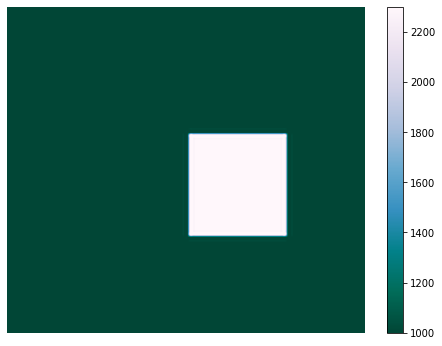

In [4]:
import numpy as np
from jaxdf import FourierSeries

density = np.ones(domain.N)*1000
density[50:90,65:100] = 2300
density = FourierSeries(np.expand_dims(density,-1), domain)

show_positive_field(density)

In [5]:
medium = Medium(domain=domain, sound_speed=1500., density=density)
time_axis = TimeAxis.from_medium(medium, cfl=0.3)

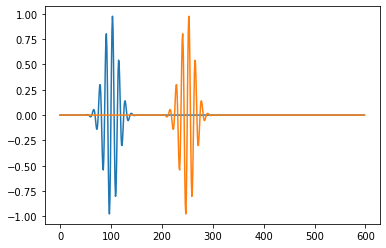

In [37]:
from jwave.signal_processing import gaussian_window, apply_ramp, smooth, analytic_signal

t = jnp.arange(0, time_axis.t_end, time_axis.dt)
s = jnp.sin(2 * jnp.pi * 4e6 * t)
s1 = gaussian_window(s ,t, 2e-6,4e-7)
s2 = gaussian_window(s ,t, 5e-6,4e-7)

plt.plot(s1)
plt.plot(s2)

In [38]:
from jwave.geometry import Sources

sources = Sources(
    positions=((28, 64),(32, 32)), 
    signals=jnp.stack([s1, s2]),
    dt = time_axis.dt,
    domain=domain
)

In [39]:
from jwave.acoustics import simulate_wave_propagation
from jax import jit

@jit
def compiled_simulator(sources):
    return simulate_wave_propagation(medium, time_axis, sources = sources)

In [40]:
pressure = compiled_simulator(sources)

Text(0.5, 1.0, 'Pressure field at t=5.999999757477781e-06')

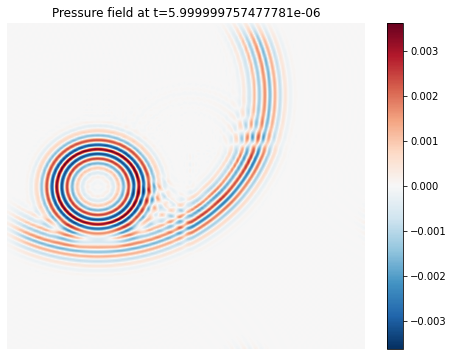

In [41]:
t = 300
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")